# Analysing exam grade trends

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [63]:
grades = pd.read_csv('data/psi_grades.csv')
# get rid of nans in the Esito column:
grades = grades.dropna(subset=['Esito'])

In [64]:
# remove rows where Esito == "ASS":
grades = grades[grades['Esito'] != 'ASS']
# where Esito == "RIT" put -1
grades.loc[grades['Esito'] == 'RIT', 'Esito'] = -1

In [68]:
# lets see all rows with Esito == 0
grades[grades['Esito'] == 0]

,Matricola,Anno Freq.,Esito,Misure Compensative
89,749004,2022/2023,0,NaN
87,749711,2023/2024,0,NaN
436,752601,2023/2024,0,NaN
434,752450,2023/2024,0,NaN
430,744101,2021/2022,0,NaN
426,752458,2023/2024,0,NaN
438,753578,2023/2024,0,NaN
425,755443,2023/2024,0,NaN
437,753272,2023/2024,0,NaN
108,754162,2023/2024,0,NaN


In [65]:
grades['Esito'] = grades['Esito'].astype(int)

In [66]:

grades.sort_values(by='Esito', ascending=False, inplace=True)
grade_counts = grades.groupby('Esito').count()
grade_counts.drop(['Anno Freq.', 'Misure Compensative'], axis=1, inplace=True)
grade_counts.columns = ['Count']

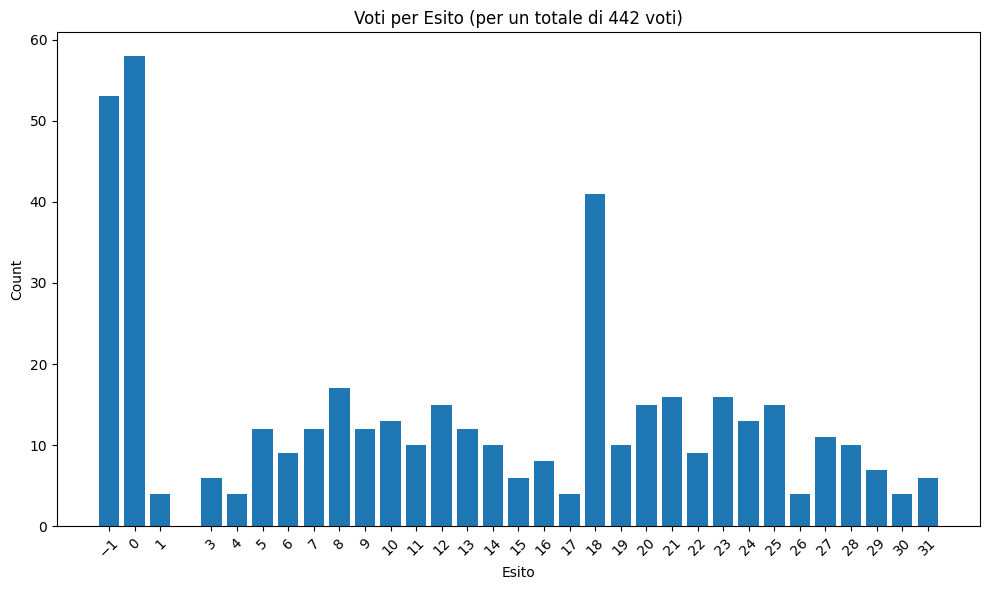

In [67]:
# sort by index (Esito) so bars are ordered
grade_counts = grade_counts.sort_index()

# plot as bar chart
plt.figure(figsize=(10, 6))  # bigger chart
plt.bar(grade_counts.index, grade_counts['Count'])

plt.xlabel('Esito')
plt.ylabel('Count')
plt.title('Voti per Esito (per un totale di ' + str(grade_counts['Count'].sum()) + ' voti)')
plt.xticks(rotation=45)  # tilt labels if many categories
plt.xticks(grade_counts.index)  # show all grades on x-axis


plt.tight_layout()
plt.show()